In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from torchmetrics.classification import BinaryAccuracy
result_path = "/Users/moustholmes/Projects/METAL-AI/logs/results.pkl"
# Use 'rb' to read in binary mode
with open(result_path, 'rb') as file:
    results = pickle.load(file)

In [8]:
# %load /Users/moustholmes/Projects/METAL-AI/configs/model/transformer_encoder_model.yaml



In [4]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %

In [2]:
element_names = {
    1: "Hydrogen", 2: "Helium", 3: "Lithium", 4: "Beryllium", 5: "Boron",
    6: "Carbon", 7: "Nitrogen", 8: "Oxygen", 9: "Fluorine", 10: "Neon",
    11: "Sodium", 12: "Magnesium", 13: "Aluminum", 14: "Silicon", 15: "Phosphorus",
    16: "Sulfur", 17: "Chlorine", 18: "Argon", 19: "Potassium", 20: "Calcium",
    21: "Scandium", 22: "Titanium", 23: "Vanadium", 24: "Chromium", 25: "Manganese",
    26: "Iron", 27: "Cobalt", 28: "Nickel", 29: "Copper", 30: "Zinc",
    31: "Gallium", 32: "Germanium", 33: "Arsenic", 34: "Selenium", 35: "Bromine",
    36: "Krypton", 37: "Rubidium", 38: "Strontium", 39: "Yttrium", 40: "Zirconium",
    41: "Niobium", 42: "Molybdenum", 43: "Technetium", 44: "Ruthenium", 45: "Rhodium",
    46: "Palladium", 47: "Silver", 48: "Cadmium", 49: "Indium", 50: "Tin",
    51: "Antimony", 52: "Tellurium", 53: "Iodine", 54: "Xenon", 55: "Cesium",
    56: "Barium", 57: "Lanthanum", 58: "Cerium", 59: "Praseodymium", 60: "Neodymium",
    61: "Promethium", 62: "Samarium", 63: "Europium", 64: "Gadolinium", 65: "Terbium",
    66: "Dysprosium", 67: "Holmium", 68: "Erbium", 69: "Thulium", 70: "Ytterbium",
    71: "Lutetium", 72: "Hafnium", 73: "Tantalum", 74: "Tungsten", 75: "Rhenium",
    76: "Osmium", 77: "Iridium", 78: "Platinum", 79: "Gold", 80: "Mercury",
    81: "Thallium", 82: "Lead", 83: "Bismuth", 84: "Polonium", 85: "Astatine",
    86: "Radon", 87: "Francium", 88: "Radium", 89: "Actinium", 90: "Thorium",
    91: "Protactinium", 92: "Uranium", 93: "Neptunium", 94: "Plutonium", 95: "Americium",
    96: "Curium", 97: "Berkelium", 98: "Californium", 99: "Einsteinium", 100: "Fermium",
    101: "Mendelevium", 102: "Nobelium", 103: "Lawrencium", 104: "Rutherfordium", 105: "Dubnium",
    106: "Seaborgium", 107: "Bohrium", 108: "Hassium", 109: "Meitnerium", 110: "Darmstadtium",
    111: "Roentgenium", 112: "Copernicium", 113: "Nihonium", 114: "Flerovium", 115: "Moscovium",
    116: "Livermorium", 117: "Tennessine", 118: "Oganesson"
}

In [5]:
df1

,ion,num_csfs,converged,num_protons,element,excitation
0,"(47, 44)",4,False,47,Silver,3
1,"(47, 44)",4,False,47,Silver,3
2,"(47, 44)",4,False,47,Silver,3
3,"(47, 44)",4,False,47,Silver,3
4,"(47, 44)",4,False,47,Silver,3
...,...,...,...,...,...,...
50043,"(21, 21)",8,False,21,Scandium,0
50044,"(21, 21)",8,False,21,Scandium,0
50045,"(38, 37)",3,False,38,Strontium,1
50046,"(38, 37)",2,False,38,Strontium,1


In [10]:
with open('/Users/moustholmes/Projects/METAL-AI/gaussian_nll_results_test.pkl', 'rb') as file:
    data_dict = pickle.load(file)
rows = []
for ion_key, ion_value in data_dict.items():
    element = element_names[ion_key[0]]
    num_asfs = len(ion_value)
    excitation = ion_key[0]-ion_key[1]
    num_protons = ion_key[0]
    for asf_key, asf_value in ion_value.items():
        # print(asf_key)
        print(asf_value)
        if isinstance(asf_value['targets'], bool):
            rows.append({'ion': ion_key, 'num_csfs': len(asf_key), 'preds': asf_value['preds'], 'targets': asf_value['targets'], 'num_protons': num_protons, 'element': element, 'excitation': excitation})
        else:
            print(asf_value['targets'], asf_value['preds'])
            for i in range(len(asf_value['targets'])):
                rows.append({'ion': ion_key, 'num_csfs': len(asf_key), 'preds': asf_value['preds'][i], 'targets': asf_value['targets'][i], 'num_protons': num_protons, 'element': element, 'excitation': excitation})
        #     rows.append({'ion': ion_key,'num_csfs':len(asf_key), 'preds': asf_value['preds'], 'targets': asf_value['targets'], 'num_protons':num_protons, 'element': element, 'excitation': excitation})
        # else:
        #     print(asf_value['targets'], asf_value['preds'])
        #     for i in range in len(asf_value['targets']):
        #         rows.append({'ion': ion_key,'num_csfs':len(asf_key), 'preds': asf_value['preds'][i], 'targets': asf_value['targets'][i], 'num_protons':num_protons, 'element': element, 'excitation': excitation})

# Create the DataFrame from the list of rows
df1 = pd.DataFrame(rows)

{'mean': array(0.4206543, dtype=float32), 'variance': array(0.6074245, dtype=float32), 'targets': array(1.524224, dtype=float32), 'excitation': array([0, 4])}


KeyError: 'preds'

In [5]:
with open('/Users/moustholmes/Projects/METAL-AI/logs/results.pkl', 'rb') as file:
    data_dict = pickle.load(file)
rows = []
targets = []
preds = []
for ion_key, ion_value in data_dict.items():

    for asf_key, asf_value in ion_value.items():
        targets.append(asf_value['targets'])
        preds.append(asf_value['preds'])  

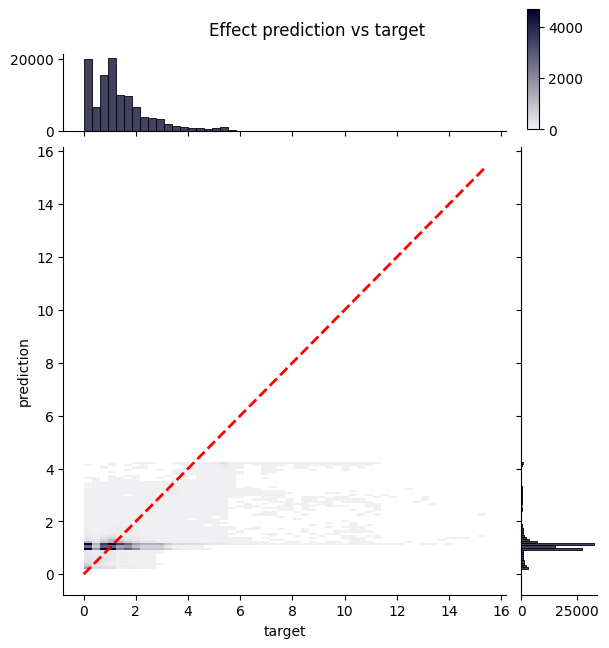

In [6]:
# Create the JointGrid for runtime vs last slice value
g = sns.JointGrid(x=np.array(targets), y=np.array(preds), marginal_ticks=True)

# Create an inset legend for the histogram colorbar in the top right
cax = g.figure.add_axes([.85, .84, .02, .2])

# Create the joint and marginal histogram plots with discrete settings
g.plot_joint(
    sns.histplot, discrete=(False, False),bins = n_bins, cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax, log_scale=(False, False)

)
g.plot_marginals(sns.histplot, element="bars", color="#03012d",bins=n_bins, discrete=False, log_scale=False)



# Set limits on x and y for the joint plot
min_val = min(np.min(targets), np.min(preds))
max_val = max(np.max(targets), np.max(preds))

# Add a 1:1 line for comparison of predictions vs targets
g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)


# Adding a figure-level title in the correct format
plt.suptitle(f'Effect prediction vs target', y=1.02)


# # Adding the correct labels to the joint plot axes
g.ax_joint.set_xlabel('target')
g.ax_joint.set_ylabel('prediction')

# Display the plot with adjusted layout
plt.show()  

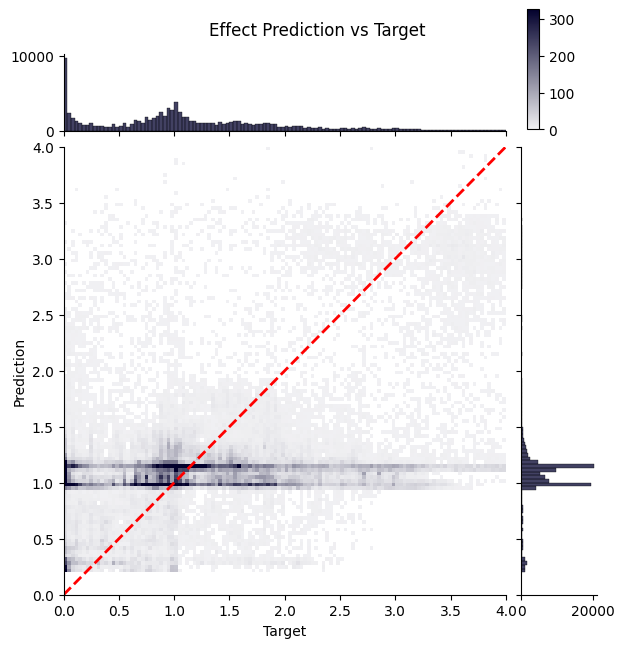

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming targets and preds are your data arrays
targets = np.array(targets)
preds = np.array(preds)

# Set the number of bins
n_bins = 120  # Adjust as needed

# Compute the common min and max values
min_val = min(np.min(targets), np.min(preds))
max_val = max(np.max(targets), np.max(preds))

max_val = 4

# Create equally spaced bin edges
bin_edges = np.linspace(min_val, max_val, n_bins + 1)

# Create the JointGrid
g = sns.JointGrid(x=targets, y=preds, marginal_ticks=True)

# Create an inset colorbar axis
cax = g.figure.add_axes([.85, .84, .02, .2])

# Plot the joint histogram with equal bin sizes and axes
g.plot_joint(
    sns.histplot,
    bins=[bin_edges, bin_edges],
    cmap="light:#03012d",
    pmax=.8,
    cbar=True,
    cbar_ax=cax,
    log_scale=False
)

# Plot the marginal histograms with equal bin sizes
g.plot_marginals(
    sns.histplot,
    bins=bin_edges,
    element="bars",
    color="#03012d",
    log_scale=False
)

# Set equal limits on both axes
g.ax_joint.set_xlim(min_val, max_val)
g.ax_joint.set_ylim(min_val, max_val)

# Add a 1:1 reference line
g.ax_joint.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',
    linestyle='--',
    lw=2
)

# Add a title and labels
plt.suptitle('Effect Prediction vs Target', y=1.02)
g.ax_joint.set_xlabel('Target')
g.ax_joint.set_ylabel('Prediction')

# Display the plot
plt.show()



In [12]:
with open('/Users/moustholmes/Projects/METAL-AI/logs/effect_gaussian_nll_test_inference.pkl', 'rb') as file:
    data_dict = pickle.load(file)

for ion_key, ion_value in data_dict.items():

    for asf_key, asf_value in ion_value.items():
        print(asf_key)
        print(asf_value)
        break
    break
        # targets.append(asf_value['targets'])
        # preds.append(asf_value['preds'])  

((np.int64(5), np.int64(5)), (np.int64(4), np.int64(4)), (np.int64(3), np.int64(4)), (np.int64(0), np.int64(0)))
{'mean': array(0.83554673, dtype=float32), 'variance': array(0.6395617, dtype=float32), 'targets': array(0.45940596, dtype=float32), 'excitation': array([5, 5])}


In [45]:
with open('/Users/moustholmes/Projects/METAL-AI/data/effect_gaussian_nll_test_inference_2.pkl', 'rb') as file:
    data_dict = pickle.load(file)


from itertools import combinations

def compare_pairs(targets, predictions):
    assert len(targets) == len(predictions), "Targets and predictions must have the same length"
    
    count_correct = 0
    total_pairs = 0

    for (i, j) in combinations(range(len(targets)), 2):
        total_pairs += 1
        if (targets[i] > targets[j] and predictions[i] > predictions[j]) or \
           (targets[j] > targets[i] and predictions[j] > predictions[i]):
            count_correct += 1

    if total_pairs == 0:
        return 0, 0
    return count_correct, total_pairs

count_correct = 0
total_pairs = 0

for ion_key, ion_value in data_dict.items():
    prev_asf_dict = {}
    for asf_key, asf_value in ion_value.items():

        prev_asf_key = frozenset(asf_key)-frozenset((tuple(asf_value['excitation']),))
        if prev_asf_key not in prev_asf_dict:
            prev_asf_dict[prev_asf_key] = {}
            prev_asf_dict[prev_asf_key]['targets'] = []
            prev_asf_dict[prev_asf_key]['means'] = []
            prev_asf_dict[prev_asf_key]['variances'] = []

        prev_asf_dict[prev_asf_key]['targets'].append(asf_value['targets'])
        prev_asf_dict[prev_asf_key]['means'].append(asf_value['mean'])
        prev_asf_dict[prev_asf_key]['variances'].append(asf_value['variance'])

    for prev_asf_key, prev_asf_value in prev_asf_dict.items():
        count_correct_new, total_pairs_new = compare_pairs(prev_asf_value['targets'], prev_asf_value['means'])
        count_correct += count_correct_new
        total_pairs += total_pairs_new

print(count_correct, total_pairs)
print(count_correct/total_pairs)

2712 4775
0.5679581151832461


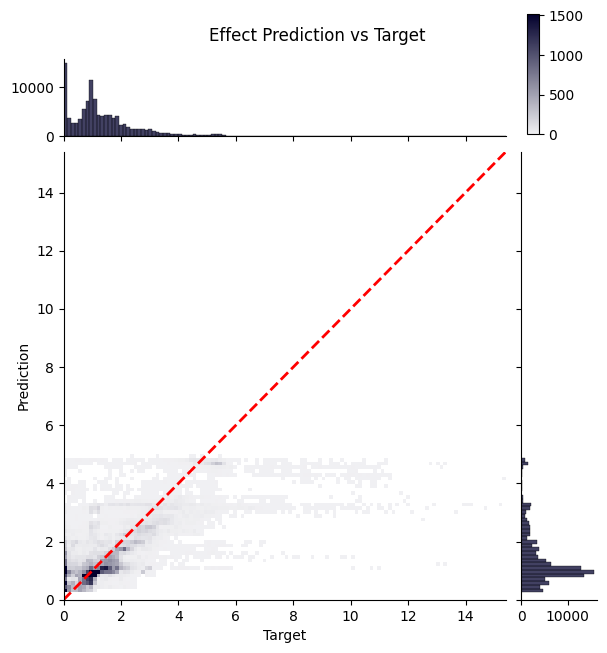

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# with open('/Users/moustholmes/Projects/METAL-AI/logs/effect_gaussian_nll_test_inference.pkl', 'rb') as file:
#     data_dict = pickle.load(file)
with open('/Users/moustholmes/Projects/METAL-AI/data/effect_gaussian_nll_test_inference_2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
means = []
targets = []
variances = []


for ion_key, ion_value in data_dict.items():

    for asf_key, asf_value in ion_value.items():
        means.append(asf_value['mean'])
        targets.append(asf_value['targets'])
        variances.append(asf_value['variance'])

# Assuming targets and preds are your data arrays
means = np.array(means)
targets = np.array(targets)
variances = np.array(variances)

# Set the number of bins
n_bins = 120  # Adjust as needed

# Compute the common min and max values
min_val = min(np.min(targets), np.min(means))
max_val = max(np.max(targets), np.max(means))

# max_val = 4

# Create equally spaced bin edges
bin_edges = np.linspace(min_val, max_val, n_bins + 1)

# Create the JointGrid
g = sns.JointGrid(x=targets, y=means, marginal_ticks=True)

# Create an inset colorbar axis
cax = g.figure.add_axes([.85, .84, .02, .2])

# Plot the joint histogram with equal bin sizes and axes
g.plot_joint(
    sns.histplot,
    bins=[bin_edges, bin_edges],
    cmap="light:#03012d",
    pmax=.8,
    cbar=True,
    cbar_ax=cax,
    log_scale=False
)

# Plot the marginal histograms with equal bin sizes
g.plot_marginals(
    sns.histplot,
    bins=bin_edges,
    element="bars",
    color="#03012d",
    log_scale=False
)

# Set equal limits on both axes
g.ax_joint.set_xlim(min_val, max_val)
g.ax_joint.set_ylim(min_val, max_val)

# Add a 1:1 reference line
g.ax_joint.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',
    linestyle='--',
    lw=2
)

# Add a title and labels
plt.suptitle('Effect Prediction vs Target', y=1.02)
g.ax_joint.set_xlabel('Target')
g.ax_joint.set_ylabel('Prediction')

# Display the plot
plt.show()

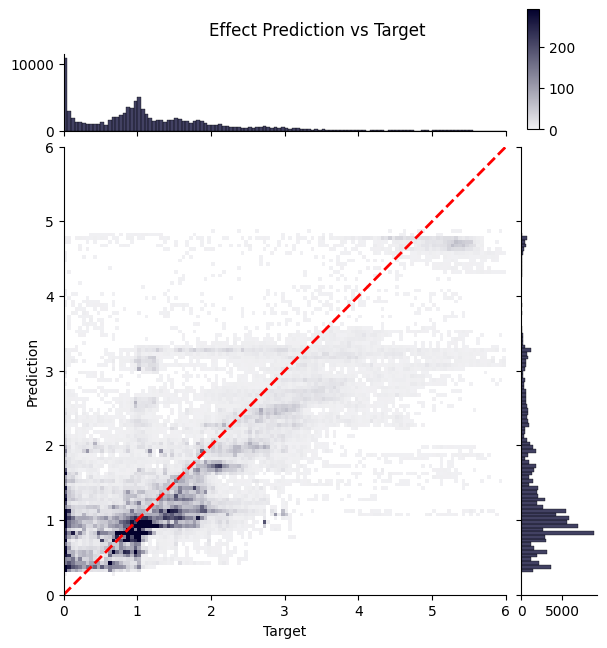

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming targets and preds are your data arrays
means = np.array(means)
targets = np.array(targets)
variances = np.array(variances)

# Set the number of bins
n_bins = 120  # Adjust as needed

# Compute the common min and max values
min_val = min(np.min(targets), np.min(means))
max_val = max(np.max(targets), np.max(means))

max_val = 6

# Create equally spaced bin edges
bin_edges = np.linspace(min_val, max_val, n_bins + 1)

# Create the JointGrid
g = sns.JointGrid(x=targets, y=means, marginal_ticks=True)

# Create an inset colorbar axis
cax = g.figure.add_axes([.85, .84, .02, .2])

# Plot the joint histogram with equal bin sizes and axes
g.plot_joint(
    sns.histplot,
    bins=[bin_edges, bin_edges],
    cmap="light:#03012d",
    pmax=.8,
    cbar=True,
    cbar_ax=cax,
    log_scale=False
)

# Plot the marginal histograms with equal bin sizes
g.plot_marginals(
    sns.histplot,
    bins=bin_edges,
    element="bars",
    color="#03012d",
    log_scale=False
)

# Set equal limits on both axes
g.ax_joint.set_xlim(min_val, max_val)
g.ax_joint.set_ylim(min_val, max_val)

# Add a 1:1 reference line
g.ax_joint.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',
    linestyle='--',
    lw=2
)

# Add a title and labels
plt.suptitle('Effect Prediction vs Target', y=1.02)
g.ax_joint.set_xlabel('Target')
g.ax_joint.set_ylabel('Prediction')

# Display the plot
plt.show()

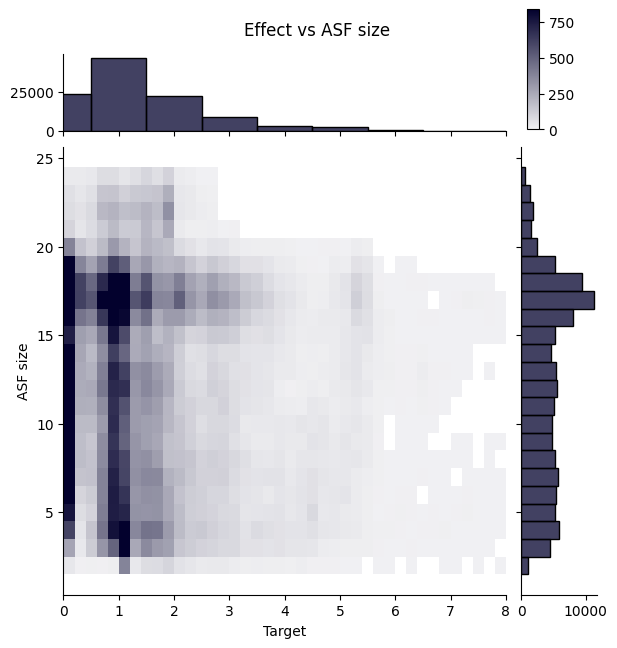

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# with open('/Users/moustholmes/Projects/METAL-AI/logs/effect_gaussian_nll_test_inference.pkl', 'rb') as file:
#     data_dict = pickle.load(file)
with open('/Users/moustholmes/Projects/METAL-AI/data/effect_gaussian_nll_test_inference_2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
means = []
targets = []
variances = []
lengths = []


for ion_key, ion_value in data_dict.items():

    for asf_key, asf_value in ion_value.items():
        means.append(asf_value['mean'])
        targets.append(asf_value['targets'])
        variances.append(asf_value['variance'])
        lengths.append(len(asf_key))

# Assuming targets and preds are your data arrays
means = np.array(means)
targets = np.array(targets)
variances = np.array(variances)
lengths = np.array(lengths)

# Set the number of bins
n_bins = 120  # Adjust as needed

# Compute the common min and max values
min_val = min(np.min(targets), np.min(lengths))
max_val = max(np.max(targets), np.max(lengths))

# max_val = 4

# Create equally spaced bin edges
bin_edges = np.linspace(min_val, max_val, n_bins + 1)

# Create the JointGrid
g = sns.JointGrid(x=targets, y=lengths, marginal_ticks=True)

# Create an inset colorbar axis
cax = g.figure.add_axes([.85, .84, .02, .2])

# Plot the joint histogram with equal bin sizes and axes
g.plot_joint(
    sns.histplot,
    bins=[bin_edges, bin_edges],
    discrete=(False, True),
    cmap="light:#03012d",
    pmax=.8,
    cbar=True,
    cbar_ax=cax,
    log_scale=False
)

# Plot the marginal histograms with equal bin sizes
g.plot_marginals(
    sns.histplot,
    bins=bin_edges,
    discrete=(False, True),
    element="bars",
    color="#03012d",
    log_scale=False
)

# Set equal limits on both axes
g.ax_joint.set_xlim(0, 8)
# g.ax_joint.set_ylim(min_val, max_val)

# # Add a 1:1 reference line
# g.ax_joint.plot(
#     [min_val, max_val],
#     [min_val, max_val],
#     color='red',
#     linestyle='--',
#     lw=2
# )

# Add a title and labels
plt.suptitle('Effect vs ASF size', y=1.02)
g.ax_joint.set_xlabel('Target')
g.ax_joint.set_ylabel('ASF size')

# Display the plot
plt.show()

<Axes: ylabel='Count'>

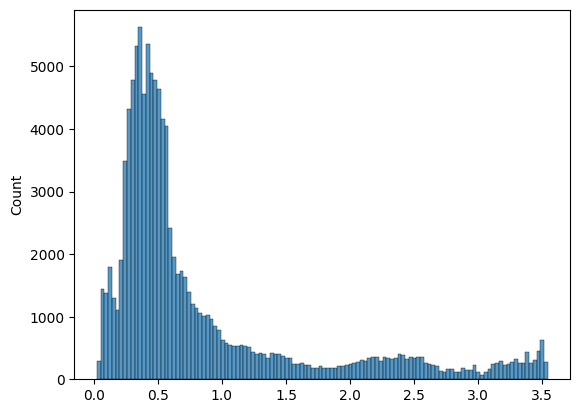

In [16]:
sns.histplot(x=variances,bins=120)

In [24]:
with open('/Users/moustholmes/Projects/METAL-AI/logs/results.pkl', 'rb') as file:
    data_dict = pickle.load(file)
rows = []
targets = []
preds = []
for ion_key, ion_value in data_dict.items():

    for asf_key, asf_value in ion_value.items():
        targets.append(asf_value['targets'])
        preds.append(asf_value['preds'])
n_bins = 50

print("hi")
    
print(targets[-1], preds[-1])

hi
1.0 1.1543181


In [25]:
print(np.array(preds).mean(), np.array(targets).mean())
print(np.abs(np.array(preds)- np.array(targets)).mean())

1.1710334 1.4155719
0.7612028


<Axes: ylabel='Count'>

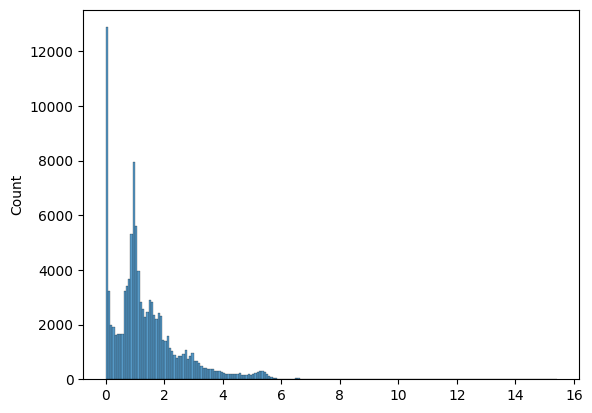

In [19]:
sns.histplot(x=np.array(targets),bins=200
)

In [3]:
import numpy as np

rows = []

for ion_key, ion_value in data_dict.items():
    element = element_names[ion_key[0]]
    num_asfs = len(ion_value)
    excitation = ion_key[0] - ion_key[1]
    num_protons = ion_key[0]
    
    for asf_key, asf_value in ion_value.items():
        # Check if 'targets' is a scalar numpy array
        if isinstance(asf_value['targets'], np.ndarray) and asf_value['targets'].shape == ():
            rows.append({
                'ion': ion_key,
                'num_csfs': len(asf_key),
                'preds': asf_value['preds'].item(),  # Extract the scalar value
                'targets': asf_value['targets'].item(),  # Extract the scalar value
                'num_protons': num_protons,
                'element': element,
                'excitation': excitation
            })
        # Check if 'targets' is a numpy array with more than one element
        elif isinstance(asf_value['targets'], np.ndarray):
            # Handle the case where preds should also be a numpy array
            if not isinstance(asf_value['preds'], np.ndarray):
                raise ValueError(f"'preds' should be a numpy array when 'targets' is a numpy array: {asf_value['preds']}")
            
            for i in range(len(asf_value['targets'])):
                rows.append({
                    'ion': ion_key,
                    'num_csfs': len(asf_key),
                    'preds': asf_value['preds'][i],
                    'targets': asf_value['targets'][i],
                    'num_protons': num_protons,
                    'element': element,
                    'excitation': excitation
                })
        else:
            raise TypeError(f"Unexpected type for 'targets': {type(asf_value['targets'])}")

# Now you can create the DataFrame from 'rows'
df = pd.DataFrame(rows)


df


NameError: name 'data_dict' is not defined

(0.0, 1000.0)

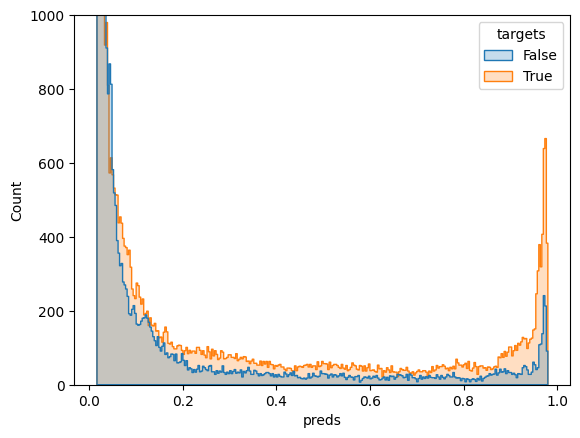

In [37]:
import seaborn as sns
sns.histplot(data=df, x="preds", hue="targets",element="step")
plt.ylim(0, 1000)

In [1]:
df['preds'].max()

NameError: name 'df' is not defined

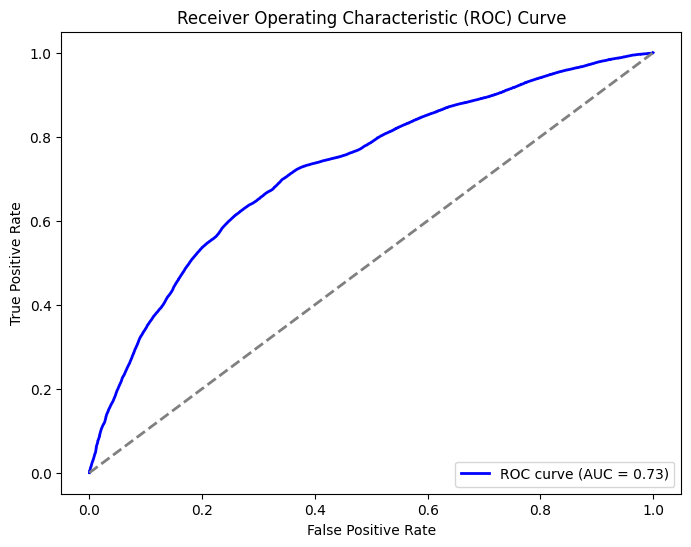

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming df is your DataFrame with 'targets' being the true labels and 'preds' being the predicted probabilities
# Ensure 'targets' are binary (0 and 1) and 'preds' are probabilities

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(df['targets'], df['preds'])

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
data_dict.keys()

dict_keys([(16, 16), (42, 40), (27, 24), (6, 3), (10, 8), (20, 20), (21, 21), (13, 10), (11, 11), (6, 6), (9, 8), (27, 25), (3, 3), (35, 34), (46, 43), (31, 29), (33, 33), (18, 15), (15, 14), (42, 42), (14, 11), (20, 18), (6, 4), (19, 16), (36, 35), (13, 12), (24, 21), (16, 15), (28, 27), (25, 24), (11, 8), (19, 18), (38, 37), (28, 26), (13, 13), (25, 23), (14, 12), (12, 9), (4, 3), (37, 36), (31, 30), (44, 41), (14, 14), (20, 19), (9, 7), (34, 31), (4, 4), (9, 9), (38, 36), (17, 15), (22, 21), (47, 44), (35, 33), (5, 4), (19, 17), (43, 43), (8, 6), (13, 11), (40, 39), (8, 5), (11, 9), (32, 29), (24, 22), (42, 41), (41, 41), (22, 22), (40, 37), (21, 19), (39, 38), (37, 35), (33, 31), (39, 39), (35, 32), (37, 34), (26, 23), (25, 22), (23, 22), (30, 27), (36, 36), (40, 38), (15, 13), (16, 13), (18, 16), (20, 17), (28, 25), (26, 25), (35, 35), (34, 34), (27, 26), (33, 32), (32, 31), (7, 7), (7, 6), (34, 33), (44, 42), (19, 19), (7, 5), (31, 31), (32, 32), (44, 44), (30, 29), (45, 44), (12

In [15]:
data_dict[(16, 16)][((np.int64(2), np.int64(2)),
  (np.int64(0),
   np.int64(0)))]

{'preds': array(0.01724274, dtype=float32),
 'targets': array(True),
 'mask': array([ True, False])}

In [23]:
n = 0
for key in results.keys():
    n += len(results[key])
print(n)

133216


In [26]:
len(results.keys())


160

In [27]:
print(results.keys())

dict_keys([(10, 8), (18, 18), (30, 29), (21, 21), (29, 28), (20, 18), (43, 43), (27, 24), (24, 21), (16, 13), (36, 36), (17, 17), (39, 39), (30, 27), (36, 35), (43, 40), (29, 29), (9, 9), (17, 15), (47, 44), (20, 19), (34, 33), (24, 23), (40, 40), (19, 18), (38, 37), (9, 8), (22, 21), (42, 41), (33, 31), (39, 38), (11, 9), (23, 20), (42, 42), (28, 26), (34, 31), (15, 13), (8, 7), (35, 34), (5, 5), (45, 43), (15, 15), (26, 23), (34, 32), (20, 20), (33, 32), (34, 34), (32, 32), (13, 10), (13, 11), (31, 29), (14, 12), (15, 12), (12, 11), (5, 4), (22, 19), (32, 29), (13, 12), (33, 33), (15, 14), (21, 19), (5, 3), (10, 9), (30, 28), (45, 42), (19, 17), (11, 8), (30, 30), (12, 12), (18, 17), (19, 19), (6, 3), (44, 42), (37, 36), (27, 26), (36, 34), (40, 37), (29, 26), (43, 41), (27, 25), (12, 9), (28, 25), (26, 24), (41, 40), (33, 30), (36, 33), (35, 33), (18, 16), (43, 42), (44, 44), (14, 14), (25, 24), (8, 8), (42, 40), (9, 7), (6, 5), (37, 34), (7, 4), (45, 44), (9, 6), (46, 43), (44, 41)

In [17]:
results[(16, 13)].keys()

dict_keys([((np.int64(2), np.int64(2)), (np.int64(0), np.int64(0))), ((np.int64(3), np.int64(5)), (np.int64(0), np.int64(0))), ((np.int64(5), np.int64(5)), (np.int64(0), np.int64(0))), ((np.int64(3), np.int64(4)), (np.int64(0), np.int64(0))), ((np.int64(2), np.int64(1)), (np.int64(0), np.int64(0))), ((np.int64(0), np.int64(3)), (np.int64(0), np.int64(0))), ((np.int64(2), np.int64(4)), (np.int64(0), np.int64(0))), ((np.int64(1), np.int64(4)), (np.int64(0), np.int64(0))), ((np.int64(3), np.int64(2)), (np.int64(0), np.int64(0))), ((np.int64(1), np.int64(3)), (np.int64(0), np.int64(0))), ((np.int64(3), np.int64(3)), (np.int64(0), np.int64(0))), ((np.int64(2), np.int64(3)), (np.int64(0), np.int64(0))), ((np.int64(4), np.int64(5)), (np.int64(0), np.int64(0))), ((np.int64(4), np.int64(3)), (np.int64(0), np.int64(0))), ((np.int64(1), np.int64(5)), (np.int64(0), np.int64(0))), ((np.int64(2), np.int64(5)), (np.int64(0), np.int64(0))), ((np.int64(4), np.int64(4)), (np.int64(0), np.int64(0))), ((n

In [11]:
predictions = []
targets = []
i = 0
for ion_key in results.keys():
    for key in results[ion_key].keys():
        i += 1
        predictions.append(float(results[ion_key][key]['preds'][results[ion_key][key]['mask']][0]))
        targets.append(float(results[ion_key][key]['targets'][results[ion_key][key]['mask']][0]))


print(len(predictions))
# plt.hist(predictions, bins=100)
binary_accuracy = BinaryAccuracy()
print(binary_accuracy(torch.tensor(predictions), torch.tensor(targets)))
# predictions

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [38]:
max(predictions)

0.9996962547302246

In [8]:
plt.hist(predictions, bins=100)

NameError: name 'predictions' is not defined

In [7]:
result_path = "/Users/moustholmes/Projects/METAL-AI/data/data_dict_Li-Rh_converged_only_restults.pkl"
# Use 'rb' to read in binary mode
with open(result_path, 'rb') as file:
    results = pickle.load(file)
for key in results[(16, 13)].keys():
    # print(key, results[(16, 13)][key])
    print(results[(16, 13)][key]['targets'])
    print(results[(16, 13)][key]['preds'])

True
0.3091533
True
0.39616588
False
0.35492876
True
0.8343709
True
0.3399874
True
0.55048764
True
0.39885074
True
0.32027966
False
0.48731673
True
0.40129277
True
0.9373828
True
0.90990126
True
0.2994887
True
0.43468264
False
0.71527994
True
0.44975224
True
0.67523146
True
0.35300085
True
0.57441247
True
0.29549584
True
0.4674887
False
0.16768445
True
0.026586395
False
0.017334094
False
0.5154689
True
0.47916192
True
0.6874572
True
0.88611126
True
0.29485482
True
0.5024364
False
0.626249
False
0.019283105
True
0.01909837
False
0.017484384
True
0.5561366
True
0.42068422
False
0.017400652
False
0.01855555
False
0.88399875
False
0.017297015
False
0.42929393
True
0.830574
True
0.028370539
False
0.42513582
True
0.5264886
True
0.10380425
True
0.017307715
True
0.5079576
False
0.72597766
True
0.96719676
True
0.93868726
True
0.92403877
True
0.032336347
True
0.36622834
False
0.85926634
True
0.19459544
True
0.47521326
False
0.017419152
False
0.057716876
False
0.4854882
True
0.21353765
True
0.449

In [25]:
for ion_key in results.keys():
    targets = []
    for key in results[ion_key].keys():
        print(ion_key, key, results[ion_key][key]['targets'], results[ion_key][key]['preds'])
for key in results[(16, 13)].keys():
    # print(key, results[(16, 13)][key])
    print(results[(16, 13)][key]['targets'][results[(16, 13)][key]['mask']])
    print(results[(16, 13)][key]['preds'][results[(16, 13)][key]['mask']])

[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[False]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99969625]
[ True]
[0.99969625]
[ True]
[0.99969625]
[False]
[0.99

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from ipywidgets import widgets
from IPython.display import display
from IPython.display import display, clear_output
data_dict_path = "/Users/moustholmes/Projects/METAL-AI/data/data_dict_Li-Rh_converged_only.pkl"
# Use 'rb' to read in binary mode
with open(data_dict_path, 'rb') as file:
    data_dict = pickle.load(file)

element_names = {
    1: "Hydrogen", 2: "Helium", 3: "Lithium", 4: "Beryllium", 5: "Boron",
    6: "Carbon", 7: "Nitrogen", 8: "Oxygen", 9: "Fluorine", 10: "Neon",
    11: "Sodium", 12: "Magnesium", 13: "Aluminum", 14: "Silicon", 15: "Phosphorus",
    16: "Sulfur", 17: "Chlorine", 18: "Argon", 19: "Potassium", 20: "Calcium",
    21: "Scandium", 22: "Titanium", 23: "Vanadium", 24: "Chromium", 25: "Manganese",
    26: "Iron", 27: "Cobalt", 28: "Nickel", 29: "Copper", 30: "Zinc",
    31: "Gallium", 32: "Germanium", 33: "Arsenic", 34: "Selenium", 35: "Bromine",
    36: "Krypton", 37: "Rubidium", 38: "Strontium", 39: "Yttrium", 40: "Zirconium",
    41: "Niobium", 42: "Molybdenum", 43: "Technetium", 44: "Ruthenium", 45: "Rhodium",
    46: "Palladium", 47: "Silver", 48: "Cadmium", 49: "Indium", 50: "Tin",
    51: "Antimony", 52: "Tellurium", 53: "Iodine", 54: "Xenon", 55: "Cesium",
    56: "Barium", 57: "Lanthanum", 58: "Cerium", 59: "Praseodymium", 60: "Neodymium",
    61: "Promethium", 62: "Samarium", 63: "Europium", 64: "Gadolinium", 65: "Terbium",
    66: "Dysprosium", 67: "Holmium", 68: "Erbium", 69: "Thulium", 70: "Ytterbium",
    71: "Lutetium", 72: "Hafnium", 73: "Tantalum", 74: "Tungsten", 75: "Rhenium",
    76: "Osmium", 77: "Iridium", 78: "Platinum", 79: "Gold", 80: "Mercury",
    81: "Thallium", 82: "Lead", 83: "Bismuth", 84: "Polonium", 85: "Astatine",
    86: "Radon", 87: "Francium", 88: "Radium", 89: "Actinium", 90: "Thorium",
    91: "Protactinium", 92: "Uranium", 93: "Neptunium", 94: "Plutonium", 95: "Americium",
    96: "Curium", 97: "Berkelium", 98: "Californium", 99: "Einsteinium", 100: "Fermium",
    101: "Mendelevium", 102: "Nobelium", 103: "Lawrencium", 104: "Rutherfordium", 105: "Dubnium",
    106: "Seaborgium", 107: "Bohrium", 108: "Hassium", 109: "Meitnerium", 110: "Darmstadtium",
    111: "Roentgenium", 112: "Copernicium", 113: "Nihonium", 114: "Flerovium", 115: "Moscovium",
    116: "Livermorium", 117: "Tennessine", 118: "Oganesson"
}

keys = data_dict.keys()
# Dropdown for Atoms
unique_atoms = sorted(set(protons for (protons, electrons) in keys if protons in element_names))
atom_dropdown = widgets.Dropdown(options=[(element_names[atom], atom) for atom in unique_atoms], description='Atom:',)

# Function to generate ion name based on charge
def generate_ion_name(protons, electrons):
    charge = protons - electrons
    return f"{charge:+}" if charge != 0 else "Neutral"

# Generating atom_data with descriptive labels
atom_data = {(protons, electrons):  generate_ion_name(protons, electrons)
             for (protons, electrons) in keys if protons in element_names}


# Dropdown for Ionization states
ion_dropdown = widgets.Dropdown(description='Ionization:',)
def update_ions(*args):
    n_protons = atom_dropdown.value
    ions = [(atom_data[(n_protons, e)], e) for (p, e) in keys if p == n_protons]
    ion_dropdown.options = ions

atom_dropdown.observe(update_ions, 'value')
update_ions()

# Display widgets
display(atom_dropdown, ion_dropdown)

# Setup output for plots
plot_output = widgets.Output()
display(plot_output)

def node_color(converged):
    if converged is None:
        return 'lightgray'
    elif converged:
        return 'blue'
    else:
        return 'red'

def update_plot(*args):
    with plot_output:
        clear_output(wait=True)
        G = nx.DiGraph(ranksep=30,voro_margin=10)#ranksep=[0.1,0.1,10,30],voro_margin=1
        line_width_bias = 0.1
        effect_scale = 2
        line_width = 0.3
        base_weight = 3
        base_effect = 0.3
        
        added_ground_state_node = False

        n_protons, n_electrons = atom_dropdown.value, ion_dropdown.value
        if (n_protons, n_electrons) in data_dict:
            #loop through ASFs smallest to largest
            for key_tuple, value in sorted(data_dict[(n_protons, n_electrons)].items(), key=lambda x: len(x[0])):

                # if the ASF have no previous ASF
                if len(key_tuple) == 2:
                    if not added_ground_state_node:
                        ground_state_node = ()
                        G.add_node(ground_state_node, converged=None)
                        added_ground_state_node = True
                    
                    
                    # print(value['converged'])
                    # print(np.any(value['converged']))
                    G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['converged']==True))
                    for i, converged in enumerate(value['converged']):
                        if not np.isnan(converged):
                            edge_label =', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(value['excitations'][i]).items() if num != 0)
                            G.add_edge(ground_state_node, key_tuple, converged = converged, effect = base_effect, weight=base_weight,label=edge_label)

                    # G.add_edge(root, prev_node, color='red',weight=weight,label=value['excitations'][not value['index']])
                else:
                    # if the ASF has previous ASFs add node and edge to previous ASF
                    # print(value['converged'])
                    # print(np.any(value['converged']))
                    G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['converged']==True))

                    for i, converged in enumerate(value['converged']):
                        if not np.isnan(converged):
                            edge_label =', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(value['excitations'][i]).items() if num != 0)
                            if 'effect' in value:
                                effect = value['effect'][i] *effect_scale
                                if np.isnan(effect):
                                    effect = base_effect
                            else:
                                effect = base_effect
                            G.add_edge( key_tuple[:i] + key_tuple[i+1:], key_tuple, label=edge_label, converged = converged, effect = effect, weight=base_weight)
                        else:
                            if key_tuple[:i] + key_tuple[i+1:] in G:
                                if np.any(value['converged']==True):
                                    G.add_edge(key_tuple[:i] + key_tuple[i+1:], key_tuple, effect = base_effect, converged = None, weight=0)

                    

        color_map = ['lightgray' if node_info['converged'] is None else 'green' if node_info['converged'] else 'red'
                     for node, node_info in G.nodes(data=True)]


        edge_colors = ['lightgray' if edge_color is None else 'green' if edge_color else 'red' for edge_color in nx.get_edge_attributes(G,'converged').values()]

        # # edge_color=edge_colors
        width = [effect + 0.1 for effect in nx.get_edge_attributes(G,'effect').values()]

        edge_labels = nx.get_edge_attributes(G, 'label') 
        # print(ground_state_node)
        pos = nx.nx_agraph.graphviz_layout(G, prog='twopi',root=ground_state_node)
        plt.figure(figsize=(15, 15))
        nx.draw(G, pos, node_color=color_map, edge_color=edge_colors,width=width, node_size=20, alpha=0.9, arrowsize=10, arrowstyle='-|>')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=7)

        plt.show()

ion_dropdown.observe(update_plot, 'value')

Dropdown(description='Atom:', options=(('Lithium', 3), ('Beryllium', 4), ('Boron', 5), ('Carbon', 6), ('Nitrog…

Dropdown(description='Ionization:', options=(('Neutral', 3),), value=None)

Output()

In [5]:
data_dict_path = "/Users/moustholmes/Projects/METAL-AI/data/data_dict_Li-Rh_converged_only_restults.pkl"
# Use 'rb' to read in binary mode
with open(data_dict_path, 'rb') as file:
    data_dict = pickle.load(file)

# Generating atom_data with descriptive labels
atom_data = {(protons, electrons):  generate_ion_name(protons, electrons)
             for (protons, electrons) in keys if protons in element_names}


# Dropdown for Ionization states
ion_dropdown = widgets.Dropdown(description='Ionization:',)
def update_ions(*args):
    n_protons = atom_dropdown.value
    ions = [(atom_data[(n_protons, e)], e) for (p, e) in keys if p == n_protons]
    ion_dropdown.options = ions

atom_dropdown.observe(update_ions, 'value')
update_ions()

# Display widgets
display(atom_dropdown, ion_dropdown)

# Setup output for plots
plot_output = widgets.Output()
display(plot_output)

def node_color(converged):
    if converged is None:
        return 'lightgray'
    elif converged:
        return 'blue'
    else:
        return 'red'

def update_plot(*args):
    with plot_output:
        clear_output(wait=True)
        G = nx.DiGraph(ranksep=30)  # ranksep=[0.1,0.1,10,30],voro_margin=1
        line_width_bias = 0.1
        effect_scale = 2
        line_width = 0.3
        base_weight = 3
        base_effect = 0.3
        
        added_ground_state_node = False

        n_protons, n_electrons = atom_dropdown.value, ion_dropdown.value
        if (n_protons, n_electrons) in data_dict:
            # Loop through ASFs smallest to largest
            for key_tuple, value in sorted(data_dict[(n_protons, n_electrons)].items(), key=lambda x: len(x[0])):
                print(key_tuple)
                # If the ASF has no previous ASF
                if len(key_tuple) == 2:
                    if not added_ground_state_node:
                        ground_state_node = ()
                        G.add_node(ground_state_node, converged=None)
                        added_ground_state_node = True
                    
                    G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['targets'] == True))
                    for i, converged in enumerate(value['targets']):
                        if not np.isnan(converged):
                            edge_label = ', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(key_tuple[i]).items() if num != 0)
                            G.add_edge(ground_state_node, key_tuple, converged=converged, effect=base_effect, weight=base_weight, label=edge_label)
                else:
                    # If the ASF has previous ASFs, add node and edge to previous ASF
                    G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['targets'] == True))
                    for i, converged in enumerate(value['targets']):
                        if not np.isnan(converged):
                            edge_label = ', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(key_tuple[i]).items() if num != 0)
                            if 'effect' in value:
                                effect = value['effect'][i] * effect_scale
                                if np.isnan(effect):
                                    effect = base_effect
                            else:
                                effect = base_effect
                            G.add_edge(key_tuple[:i] + key_tuple[i+1:], key_tuple, label=edge_label, converged=converged, effect=effect, weight=base_weight)
                        else:
                            if key_tuple[:i] + key_tuple[i+1:] in G:
                                if np.any(value['targets'] == True):
                                    G.add_edge(key_tuple[:i] + key_tuple[i+1:], key_tuple, effect=base_effect, converged=None, weight=0)

        # Separate nodes into two groups: one for circles and one for crosses
        round_nodes = [node for node, node_info in G.nodes(data=True) if node_info['targets'] is not None and node_info['targets']]
        cross_nodes = [node for node, node_info in G.nodes(data=True) if node_info['targets'] is not None and not node_info['targets']]

        # Color map based on prediction values (replace with actual prediction logic if needed)
        color_map = ['lightgray' if node_info['converged'] is None else node_info['predictions']  # assuming `prediction` is stored in node_info
                     for node, node_info in G.nodes(data=True)]

        # Edge colors remain the same as before
        edge_colors = ['lightgray' if edge_color is None else 'green' if edge_color else 'red' for edge_color in nx.get_edge_attributes(G, 'converged').values()]

        # Edge widths based on effect
        width = [effect + 0.1 for effect in nx.get_edge_attributes(G, 'effect').values()]

        edge_labels = nx.get_edge_attributes(G, 'label')
        pos = nx.nx_agraph.graphviz_layout(G, prog='twopi', root=ground_state_node)
        plt.figure(figsize=(15, 15))

        # Draw round nodes (previously green)
        nx.draw_networkx_nodes(G, pos, nodelist=round_nodes, node_shape='o', node_color=color_map, node_size=300, alpha=0.9)
        
        # Draw cross nodes (previously red)
        nx.draw_networkx_nodes(G, pos, nodelist=cross_nodes, node_shape='x', node_color=color_map, node_size=300, alpha=0.9)

        # Draw edges
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=width, alpha=0.9, arrowsize=20, arrowstyle='-|>')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
        nx.draw_networkx_labels(G, pos, font_size=10)

        plt.show()

ion_dropdown.observe(update_plot, 'value')

Dropdown(description='Atom:', options=(('Lithium', 3), ('Beryllium', 4), ('Boron', 5), ('Carbon', 6), ('Nitrog…

Dropdown(description='Ionization:', options=(('Neutral', 3),), value=None)

Output()